<a href="https://colab.research.google.com/github/hafizaah95/CapstoneProject-ML/blob/main/Cotton_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 21.7 MB/s eta 0:00:00


In [3]:
pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
import os

drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
base_dir="/content/drive/MyDrive/cotton"
!ls"/content/drive/MyDrive/cotton"

/bin/bash: ls/content/drive/MyDrive/cotton: No such file or directory


In [7]:
directory =os.path.join(base_dir,"train/")

In [8]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Target spot', 'Powdery Mildew', 'Healthy', 'Bacterial Blight', 'Aphids', 'Army worm']
6


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
            image=img_to_array(image)
            image=image/255.0
            if t<60:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [11]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [12]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [13]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [14]:
print(len(labels))
print(len(tlabels))

360
2020


In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(288, 224, 224, 3)
(72, 224, 224, 3)
(288, 6)
(72, 6)


In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

In [18]:
# Load the pre-trained model without the top (classification) layers
pretrained_model = tf.keras.applications.DenseNet201(weights='imagenet', input_shape=(224,224,3),include_top=False,pooling='avg')

# Freeze the pre-trained layers so they are not updated during training
for layer in pretrained_model.layers:
  layer.trainable = False

74836368/74836368 [==============================] - 3s 0us/step


In [19]:
from tensorflow.keras import layers
from keras.layers import Flatten
from keras.layers import BatchNormalization

inputs = pretrained_model.input
x = Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)  # Dropout layer dengan dropout rate 0.2
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
9/9 [==============================] - 35s 1s/step - loss: 1.8728 - accuracy: 0.2292 - val_loss: 1.6357 - val_accuracy: 0.2917
Epoch 2/50
9/9 [==============================] - 5s 589ms/step - loss: 1.5744 - accuracy: 0.3681 - val_loss: 1.4005 - val_accuracy: 0.5972
Epoch 3/50
9/9 [==============================] - 5s 522ms/step - loss: 1.3236 - accuracy: 0.5278 - val_loss: 1.2442 - val_accuracy: 0.6667
Epoch 4/50
9/9 [==============================] - 4s 437ms/step - loss: 1.2032 - accuracy: 0.6076 - val_loss: 1.1211 - val_accuracy: 0.6667
Epoch 5/50
9/9 [==============================] - 5s 586ms/step - loss: 1.0028 - accuracy: 0.6979 - val_loss: 0.9578 - val_accuracy: 0.6944
Epoch 6/50
9/9 [==============================] - 5s 557ms/step - loss: 0.9452 - accuracy: 0.6979 - val_loss: 0.8677 - val_accuracy: 0.7361
Epoch 7/50
9/9 [==============================] - 7s 801ms/step - loss: 0.7833 - accuracy: 0.7882 - val_loss: 0.7907 - val_accuracy: 0.7222
Epoch 8/50
9/9 [======

In [22]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

3/3 [==============================] - 4s 171ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.92      0.92      0.92        13
           2       0.93      1.00      0.97        14
           3       0.79      1.00      0.88        11
           4       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        10

    accuracy                           0.93        72
   macro avg       0.94      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72



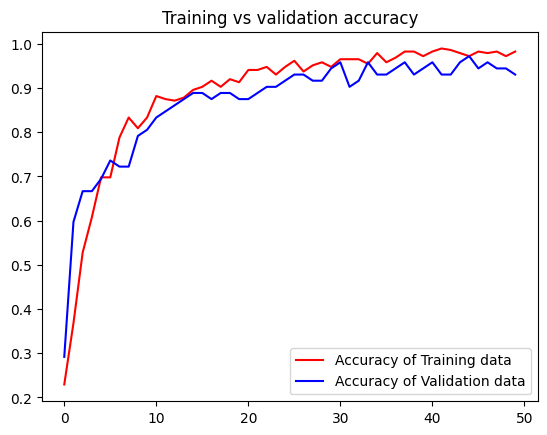

<Figure size 640x480 with 0 Axes>

In [23]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

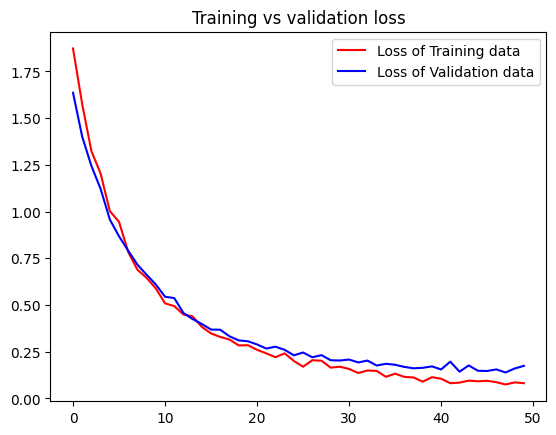

<Figure size 640x480 with 0 Axes>

In [24]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [37]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224, 224))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  print(classes[0])
  value=np.argmax(classes)
  move_name=mapper(value)
  
  print("Prediction is {}.".format(move_name))
 

Saving 25.jpg to 25.jpg
1/1 [==============================] - 0s 52ms/step
[2.1504613e-03 3.4155333e-04 2.4816629e-06 1.0300402e-03 9.8226649e-01
 1.4208937e-02]
Prediction is Aphids.


In [38]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(2020, 224, 224, 3)
64/64 [==============================] - 11s 177ms/step
(2020, 6)


In [39]:
ANS=tlabels0

In [40]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9183168316831684


In [44]:
# Save model weights and architecture
model.save_weights('/content/drive/MyDrive/cotton/model_weights.h5')
model.save('/content/drive/MyDrive/cotton/model_saved.h5')

In [46]:
from tensorflow.keras.models import load_model

# Load model architectur
loaded_model = load_model('/content/drive/MyDrive/cotton/model_saved.h5')

# Load model weights
loaded_model.load_weights('/content/drive/MyDrive/cotton/model_weights.h5')

In [47]:
export = '/content/drive/MyDrive/cotton/saved_model'
tf.saved_model.save(model, export)

In [48]:
# Select mode of optimization
mode = "Storage" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [49]:
converter = tf.lite.TFLiteConverter.from_saved_model(export)
converter.optimizations = [optimization]
tflite_model = converter.convert();

In [51]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

20361352